# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        


        
    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    if (record_count == 49):
        time.sleep(60)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | dicabisagan
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | tecoanapa
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | cacu
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | marcona
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sola
Processing Record 19 of Set 1 | boa vista
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | athlone
Processing Recor

In [ ]:
#city_data

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data= city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,4.88,50,0,0.45,US,1669699046
1,mar del plata,-38.0023,-57.5575,20.61,97,0,3.09,AR,1669698990
2,alofi,-19.0595,-169.9187,25.94,73,96,4.63,NU,1669699047
3,dicabisagan,17.0818,122.4157,29.83,69,42,2.00,PH,1669699047
4,saldanha,-33.0117,17.9442,16.40,93,100,7.82,ZA,1669699047


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,4.88,50,0,0.45,US,1669699046
1,mar del plata,-38.0023,-57.5575,20.61,97,0,3.09,AR,1669698990
2,alofi,-19.0595,-169.9187,25.94,73,96,4.63,NU,1669699047
3,dicabisagan,17.0818,122.4157,29.83,69,42,2.00,PH,1669699047
4,saldanha,-33.0117,17.9442,16.40,93,100,7.82,ZA,1669699047


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

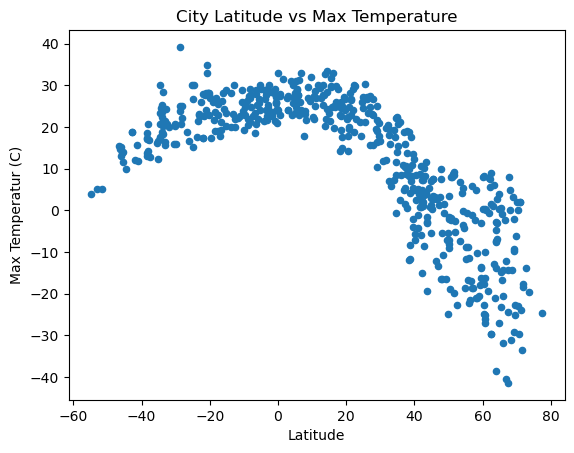

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatur (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

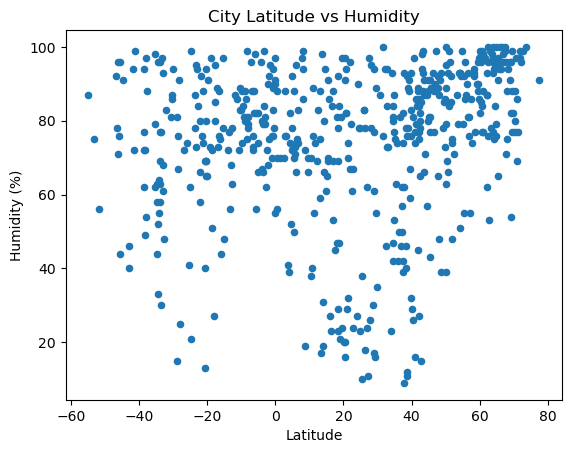

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

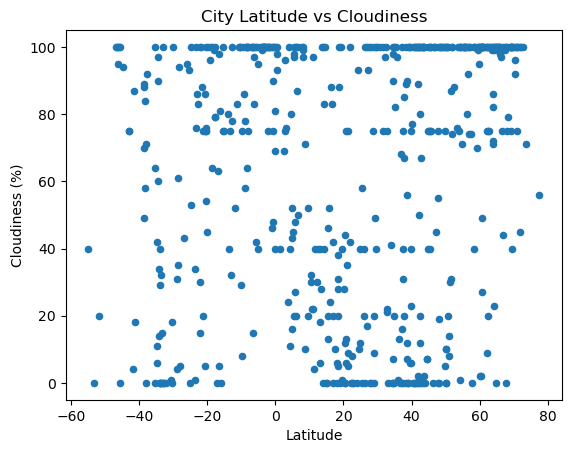

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

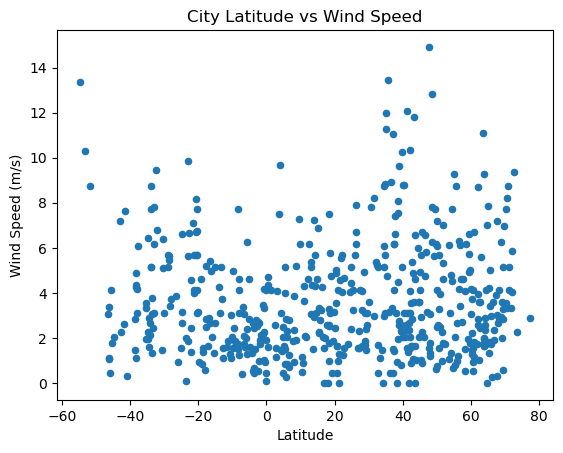

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def lin_reg(df, y_value):
    x_v = df['Lat']
    y_v = df[y_value]
    
    plt.scatter(x_v, y_v)
    plt.xlabel('Latitude')
    plt.ylabel(y_value)
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_v, y_v)
    
    regress_values = x_v * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.plot(x_v,regress_values,"r-")
    if x_v.mean()>0:
        plt.annotate(line_eq,(20,15),fontsize=10,color="red")
    elif x_v.mean()<0:
        plt.annotate(line_eq,(-20,15),fontsize=10,color="red")    
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()
    
    return
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,4.88,50,0,0.45,US,1669699046
3,dicabisagan,17.0818,122.4157,29.83,69,42,2.00,PH,1669699047
6,tecoanapa,16.5167,-98.7500,25.06,84,83,2.03,MX,1669699126
12,barrow,71.2906,-156.7887,-23.99,77,100,4.12,US,1669698916
14,tiksi,71.6872,128.8694,-33.45,99,45,3.31,RU,1669699279


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,20.61,97,0,3.09,AR,1669698990
2,alofi,-19.0595,-169.9187,25.94,73,96,4.63,NU,1669699047
4,saldanha,-33.0117,17.9442,16.40,93,100,7.82,ZA,1669699047
5,hobart,-42.8794,147.3294,18.92,46,75,7.20,AU,1669698864
7,busselton,-33.6500,115.3333,28.30,30,0,3.06,AU,1669699126


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7273903261703069


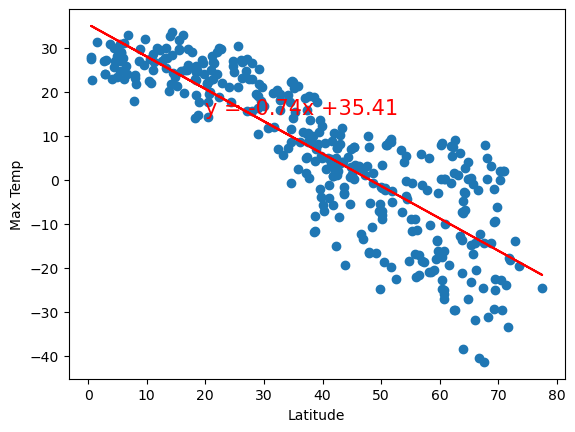

In [33]:
# Linear regression on Northern Hemisphere
#y = 'Max Temp'
#lin_reg(northern_hemi_df, y)
x_v = northern_hemi_df['Lat']
y_v = northern_hemi_df['Max Temp']
    
plt.scatter(x=x_v, y=y_v)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_v, y_v)
    
regress_values = x_v * slope + intercept
    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
plt.plot(x_v,regress_values,"r-")


plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    
print(f"The r-value is: {rvalue**2}")
    
plt.show()

The r-value is: 0.4060743518568672


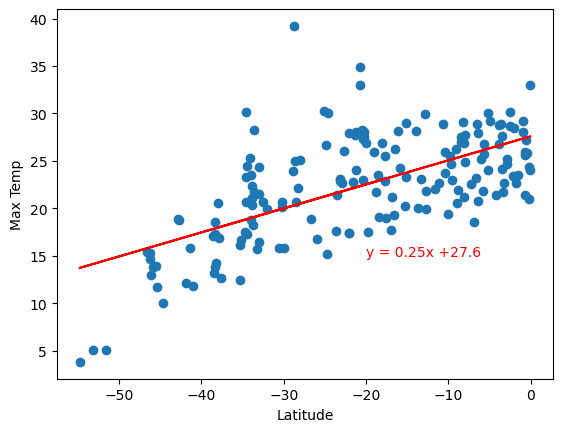

In [58]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1416682898332255


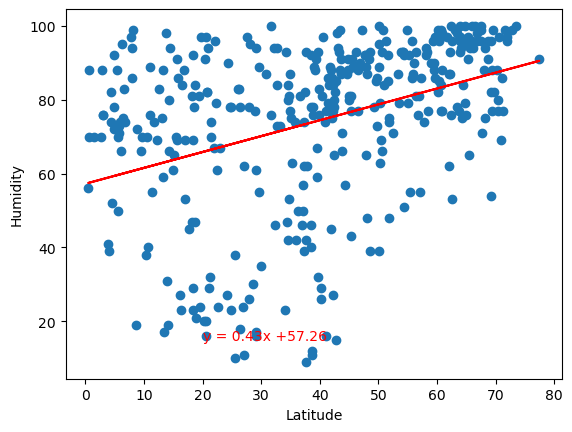

In [40]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Humidity')

The r-value is: 0.03428011937825604


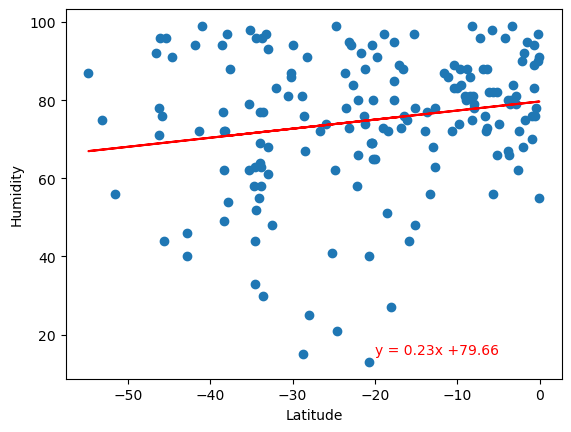

In [59]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10287032179733362


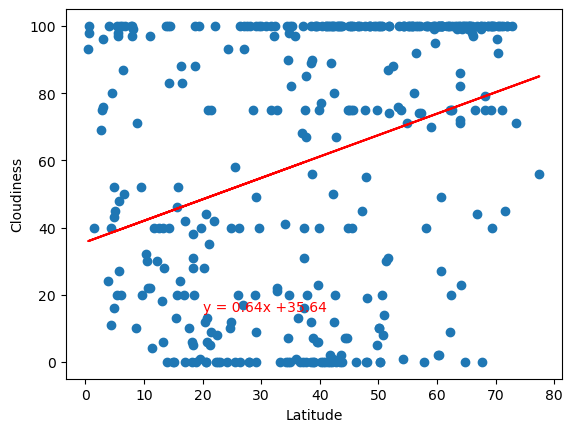

In [42]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Cloudiness')

The r-value is: 0.15154101070810555


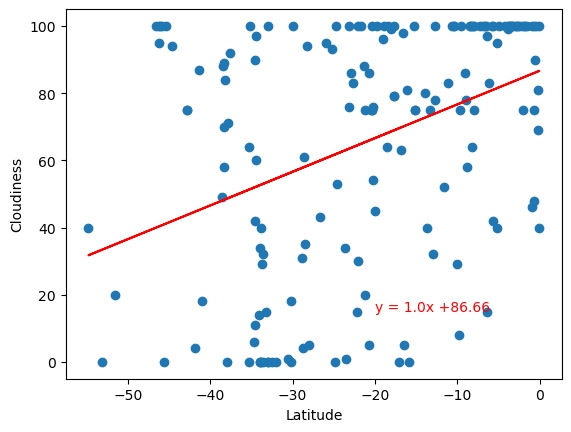

In [60]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009160326142396907


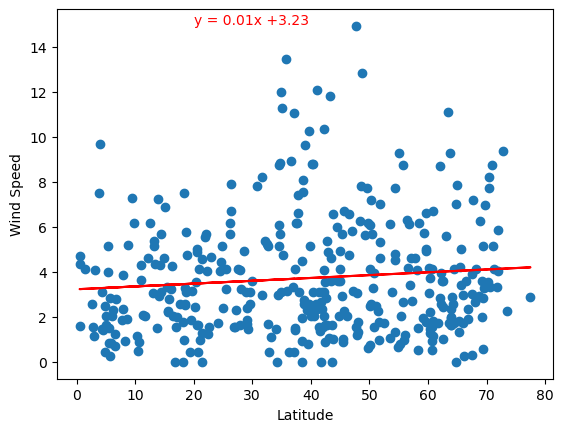

In [44]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Wind Speed')

The r-value is: 0.13483491047670979


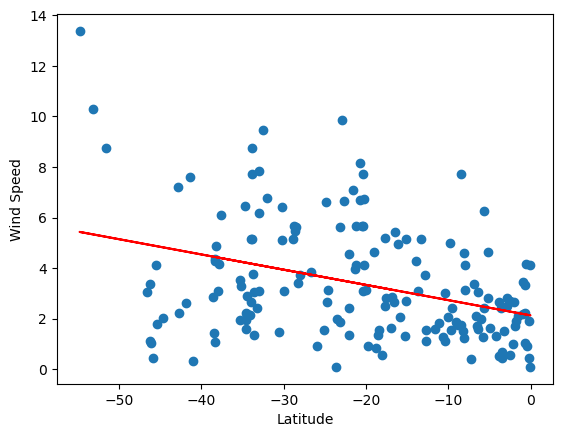

In [62]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness seems to have alot of outliners for it to be useful for linear regression.

Wind speed and Humidity have decent amount of outliners based on the scatterplot but for the most part they follow the linear regression. I think it might be due to altitude differences between cities that was not incorporated.

Max Temp seems to go really well with the linear regression, thus it is useful to use to predict temperature based on latitude.